# Projeto: Conscientização e Prevenção ao suicídio

["Uma pessoa comete suicídio a cada 40 segundos, afirma OMS."](https://www.paho.org/bra/index.php?option=com_content&view=article&id=6017:suicidio-uma-pessoa-morre-a-cada-40-segundos-afirma-oms&Itemid=839)

["Na contramão da tendência mundial, taxa de suicídio aumenta 7% no Brasil em seis anos"](https://g1.globo.com/ciencia-e-saude/noticia/2019/09/10/na-contramao-da-tendencia-mundial-taxa-de-suicidio-aumenta-7percent-no-brasil-em-seis-anos.ghtml)

Infelizmente notícias como esta vem se tornando cada vez mais comuns nos dias atuais e envolvem inúmeros fatores que variam desde problemas relacionados a depressão, conflitos familiares ou amorosos, questões sociais e financeiras, traumas, etc. Entretanto, o que devemos fazer quando nos deparamos com estes índices capazes de causar espanto a qualquer um, sabemos que atualmente há diferentes formas que visam auxiliar no processo de conscientização e prevenção ao suicídio, seja através de populares campanhas como o [Setembro Amarelo](https://www.setembroamarelo.com), palestras institucionais ou até mesmo pela divulgação sobre este tema em meios de comunicação mais populares e acessíveis. 

Assim sendo, este breve projeto de visualização de dados tem como objetivo contribuir para este processo de conscientização e prevenção ao suicídio, buscando exibir de forma clara e objetiva informações que possam ser suficientemente relevantes para auxiliar esta difícil situação enfrentada mundialmente.


# Descrição do conjunto de dados
O conjunto de dados utilizado para o desenvolvimento deste projeto foi retirado da comunidade online Kaggle, relacionada diretamente com a área de ciência de dados. Este conjunto [“Suicide Rates Overview 1985 to 2016”](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016) apresenta uma série de informações socioeconômicas que podem ser analisadas e até mesmo correlacionadas aos índices de suicídios em todo o mundo.

# Bibilioteca utilizadas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
%matplotlib inline

# Dados

In [2]:
# Importando os dados
dados = pd.read_csv("master.csv")

# Exibindo as três primeiras entradas do nosso conjunto de dados
dados.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X


In [3]:
# Selecionando dados apenas do Brasil
dados_brasil = dados[dados['country'] == 'Brazil']

# Exibindo as três primeiras entradas dos nosso novo conjunto de dados referentes ao Brasil
dados_brasil.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent


# Número total de suicídios por ano - Brasil (1985 - 2015)

### Organizando os dados

In [4]:
# Agrupando o número total de suicídios por ano
total_suicidios_por_ano = dados_brasil.groupby('year',  as_index=False)['suicides_no'].sum()

### Visualizando os dados

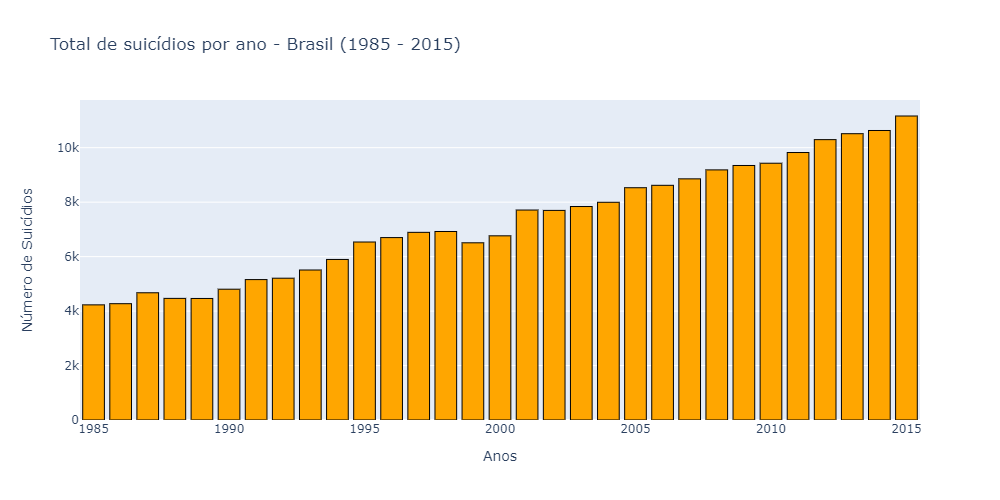

In [5]:
# Criando uma figura pra plotar os gráficos
fig_suicidios_por_ano = go.Figure()

# Plotando o gráfico de barras
fig_suicidios_por_ano.add_trace(go.Bar(x=total_suicidios_por_ano['year'], y=total_suicidios_por_ano['suicides_no'], marker_color='#ffa600'))

# Adicionando contorno as barras
fig_suicidios_por_ano.update_traces(marker_line_color='#000000', marker_line_width=1)

# Inserindo o título do gráfico e dos eixos 
fig_suicidios_por_ano.update_layout(title='Total de suicídios por ano - Brasil (1985 - 2015)',  
                                       xaxis_title='Anos', yaxis_title='Número de Suicídios')

# Exibindo o gráfico de barras
fig_suicidios_por_ano.show('png', width=1000, height=500)

# Número total de suicídios por sexo - Brasil (1985 - 2015)

### Organizando os dados

In [6]:
# Agrupando o número total de suicídios por ano e sexo
total_suicidios_por_sexo = dados_brasil.groupby(['year', 'sex'], as_index=False)['suicides_no'].sum()

# Selecionando apenas o número total de suicídios por ano dos homens
suicidios_por_ano_homem = total_suicidios_por_sexo[total_suicidios_por_sexo['sex']=='male']['suicides_no']

# Selecionando apenas o número total de suicídios por ano das mulheres
suicidios_por_ano_mulher = total_suicidios_por_sexo[total_suicidios_por_sexo['sex']=='female']['suicides_no']

### Visualizando os dados -  Gráfico de barras

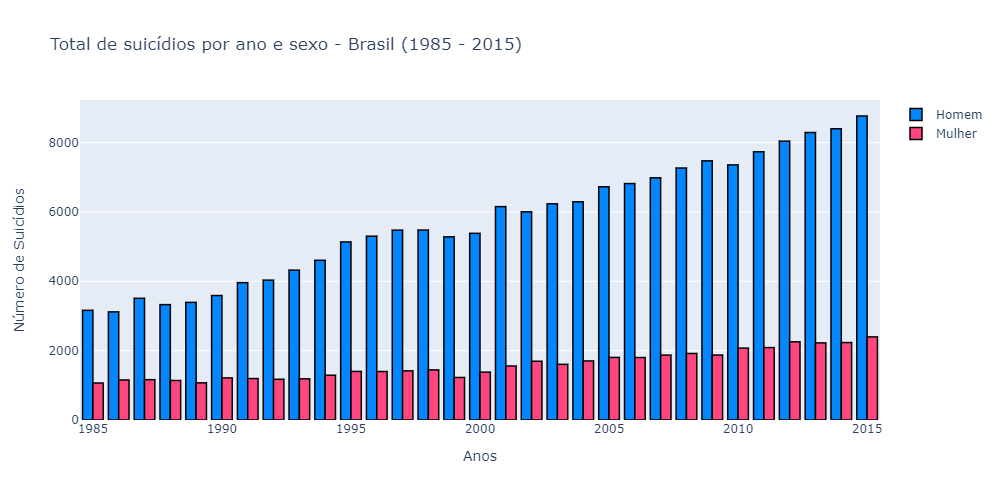

In [7]:
# Criando uma figura pra plotar o gráfico
fig_suicidios_por_sexo = go.Figure()

# Plotando o gráfico de barras referente aos dados dos homens
fig_suicidios_por_sexo.add_trace(go.Bar(x=total_suicidios_por_sexo['year'].unique(), y=suicidios_por_ano_homem, name='Homem', marker_color='#0486ff'))

# Plotando o gráfico de barras referente aos dados das mulheres
fig_suicidios_por_sexo.add_trace(go.Bar(x=total_suicidios_por_sexo['year'].unique(), y=suicidios_por_ano_mulher, name='Mulher', marker_color='#ff467e'))

# Adicionando contorno as barras
fig_suicidios_por_sexo.update_traces(marker_line_color='#000000', marker_line_width=1.5)

# Inserindo o título do gráfico e dos eixos 
fig_suicidios_por_sexo.update_layout(title='Total de suicídios por ano e sexo - Brasil (1985 - 2015)',  xaxis_title='Anos', yaxis_title='Número de Suicídios')

# Exibindo o gráfico de barras
fig_suicidios_por_sexo.show('png', width=1000, height=500)

### Visualizando os dados -  Gráfico de pizza

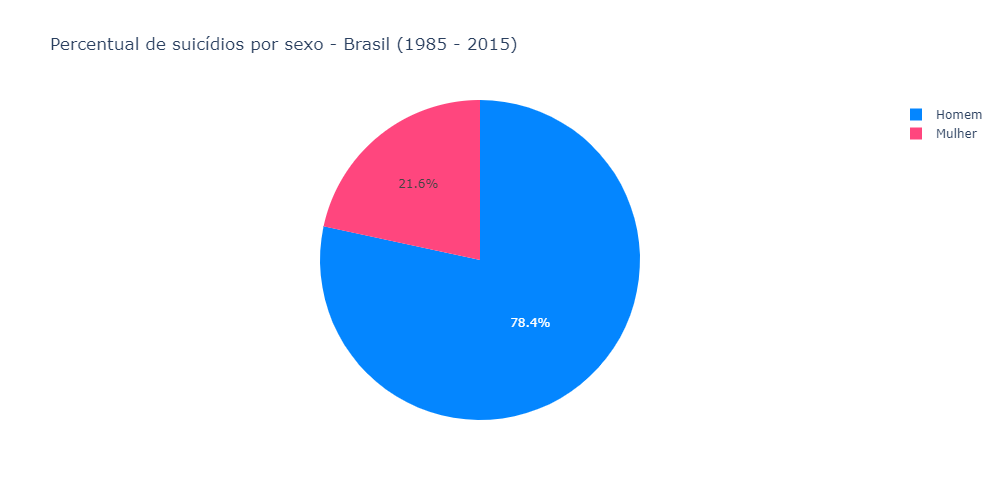

In [8]:
# Criando uma figura pra plotar o gráfico
fig2_suicidios_por_sexo = go.Figure()

# Plotando o gráfico de pizza
fig2_suicidios_por_sexo.add_trace(go.Pie(labels=['Homem', 'Mulher'], 
                                  values=[sum(suicidios_por_ano_homem), sum(suicidios_por_ano_mulher)]))

# Especificando cores utilizadas (Azul e rosa)
cores= ['#0486ff', '#ff467e']

# Adicionando as cores selecionadas anteriormente
fig2_suicidios_por_sexo.update_traces(marker_colors=cores)

# Inserindo o título do gráfico
fig2_suicidios_por_sexo.update_layout(title='Percentual de suicídios por sexo - Brasil (1985 - 2015)')

# Exibindo o gráfico de pizza
fig2_suicidios_por_sexo.show('png', width=1000, height=500)

# Número total de suicídios por faixa etária - Brasil (1985 - 2015)

### Organizando os dados

In [9]:
# Agrupando o número de suicídios por ano e faixa etária
total_suicidios_por_ano_idade = dados_brasil.groupby(['year', 'age'], as_index=False)['suicides_no'].sum()

# Agrupando o número total de suicídios por faixa etária
total_suicidios_por_idade = total_suicidios_por_ano_idade.groupby(['age'])['suicides_no'].sum()

# Ordenando número total de suicídios por faixa etária
total_suicidios_por_idade_ordenado = [] # Criando lista ordenada

ordem_faixa_etaria = [ '5-14 years','15-24 years', '25-34 years', '35-54 years', '55-74 years','75+ years'] # Idades ordenadas

for i in ordem_faixa_etaria:
    total_suicidios_por_idade_ordenado.append(total_suicidios_por_idade[i]) # Armazenando valores organizados na lista

### Visualizando os dados

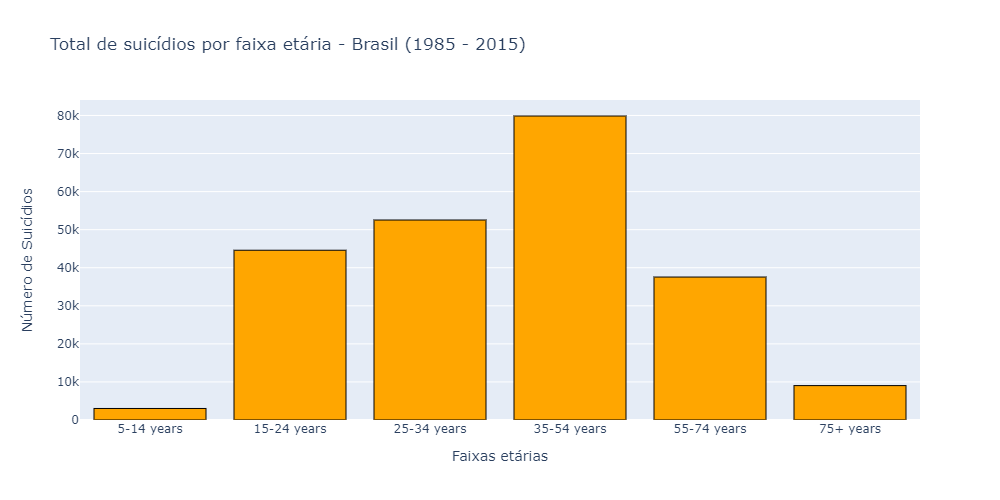

In [10]:
# Criando uma figura pra plotar o gráfico
fig_suicidios_por_idade = go.Figure()

# Plotando o gráfico de barras
fig_suicidios_por_idade.add_trace(go.Bar(x=ordem_faixa_etaria, y=total_suicidios_por_idade_ordenado, marker_color='#ffa600'))

# Adicionando contorno as barras
fig_suicidios_por_idade.update_traces(marker_line_color='#000000', marker_line_width=1.0)

# Inserindo o título do gráfico e dos eixos 
fig_suicidios_por_idade.update_layout(title='Total de suicídios por faixa etária - Brasil (1985 - 2015)',  
                                       xaxis_title='Faixas etárias', yaxis_title='Número de Suicídios')

# Exibindo o gráfico de barras
fig_suicidios_por_idade.show('png', width=1000, height=500)

# Brasil e o Mundo (1985-2015) 

### Organizando os dados

In [11]:
# Agrupando o número total de suicídios por país
total_suicidios_por_pais = dados.groupby(['country'], as_index=False)['suicides_no'].sum()

# Selecionando os 10 países com o maior número total de suicídios
top_10_paises = total_suicidios_por_pais.sort_values(by=['suicides_no'], ascending=False).head(10)

### Visualizando os dados

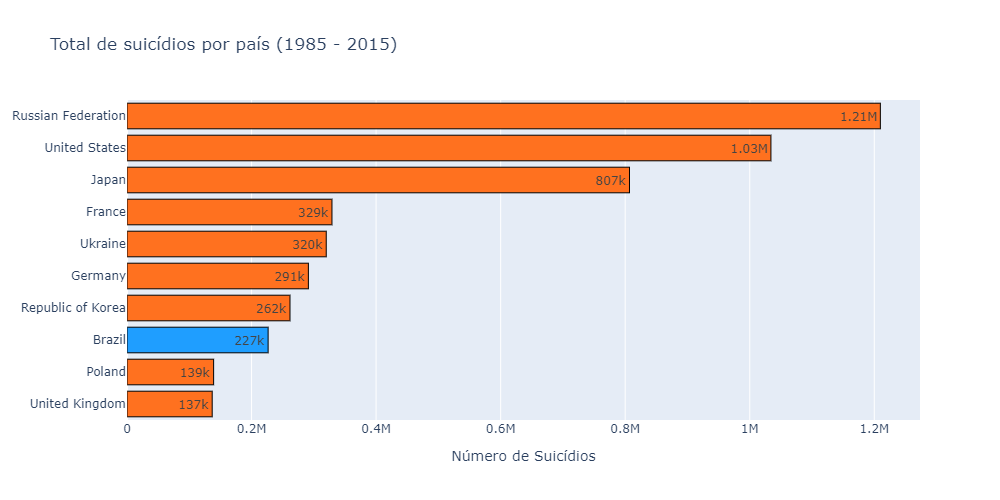

In [12]:
# Criando uma figura pra plotar o gráfico
figura_suicidios_por_pais = go.Figure()

# Especificando cores utilizadas (Laranja e azul)
cores = ['#ff711f', '#ff711f', '#ff711f', '#ff711f', '#ff711f', '#ff711f', '#ff711f', '#1f9eff', '#ff711f', '#ff711f']

# Plotando o gráfico de barras
figura_suicidios_por_pais.add_trace(go.Bar(x=top_10_paises['suicides_no'], y=top_10_paises['country'], marker_color=cores, 
                                           orientation='h', text=top_10_paises['suicides_no'], textposition='auto'))

# Adicionando contorno e legendas as barras 
figura_suicidios_por_pais.update_traces(marker_line_color='#000000', marker_line_width=1.0, texttemplate='%{text:.3s}')

# Inserindo o título do gráfico e dos eixos 
figura_suicidios_por_pais.update_layout(title='Total de suicídios por país (1985 - 2015)',  
                                     xaxis_title='Número de Suicídios', yaxis={'categoryorder':'total ascending'})

# Exibindo o gráfico de barras
figura_suicidios_por_pais.show('png', width=1000, height=500)

# Breve análise
Podemos observar, através deste simples projeto de visualização de dados, uma série de informações relevantes sobre os indicies de suicídio em nosso país, tais como:

- O número total de suicídios ao longo dos anos vem aumentando consideravelmente;
- Homens tendem a cometer mais suicídios do que as mulheres;
- A faixa etária de 35 a 54 anos é a que mais possui casos de suicídio;
- O Brasil encontra-se entre os 10 países com mais casos de suicídio.

Deste modo, notamos que este projeto  tem como finalidade propiciar uma visão primordial sobre este tema tão relevante para os dias atuais, buscando, mesmo que de maneira simplista, cooperar e auxiliar neste complexo trabalho de conscientização e prevenção ao suicídio.